In [19]:
from keras.layers import Input, Conv2D, Activation
from keras import layers
from keras.models import Model
from keras.layers.normalization import BatchNormalization

In [21]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
res = Conv2D(16, (1, 1), padding='same')(input_img)
residual = layers.add([x,res])
residual = BatchNormalization(axis=-1)(residual)
residual = Activation(activation='relu')(residual)

x = Conv2D(1, (3, 3), activation='relu', padding='same')(residual)
res = Conv2D(1, (1, 1), padding='same')(residual)
residual = layers.add([x,res])
out = Activation(activation='relu')(residual)

In [22]:
autoencoder = Model(input_img, out)

In [23]:
autoencoder.compile(optimizer='adam', loss='mse')

In [24]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [25]:
hist = autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test, x_test),
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 90s - loss: 0.0798 - val_loss: 0.0077

In [26]:
decoded_imgs = autoencoder.predict(x_test)

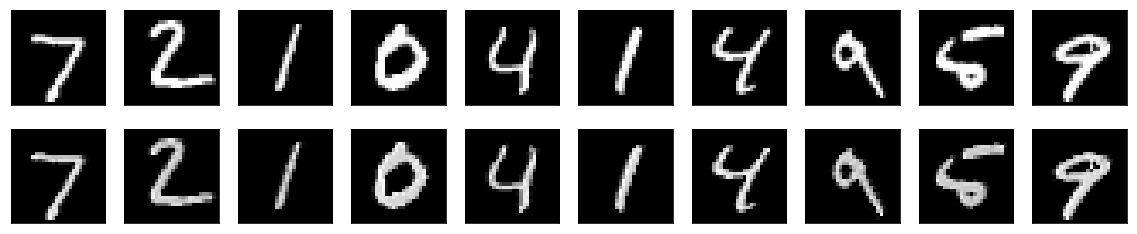

In [27]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()